### Bayes' Theorem
    The algorithm is based on the famous Bayes theorem named after Rev. Thomas Bayes. It works on conditional probability. Conditional probability is the probability that something will happen, given that something else has already occurred. Using the conditional probability, we can calculate the probability of an event using its prior knowledge.
    
    Bayes' theorem is stated mathematically as the following equation:
    
$$\large p(A/B) \space = \space \frac {p(A) \space . \space p(B/A)}{p(B)}$$        

   where $A$ and $B$ are events and $P(B) \neq 0$.
   
   $P(A|B)$     is a conditional probability: the likelihood of event  occurring given that  is true.
   
   $P(B|A)$ is also a conditional probability: the likelihood of event  occurring given that  is true.
   
   $P(A) \space and \space P(B)$ and  are the probabilities of observing  and  independently of each other; this is known as the marginal probability.
   
#### What's Naive in Naive Bayes and why is it a super fast algorithm?

        It is called naive Bayes because the calculation of the probabilities for each hypothesis are simplified to make their calculation tractable. Rather than attempting to calculate the values of each attribute value, they are assumed to be conditionally independent given the target value.
        
        This is a very strong assumption that is most unlikely in real data, i.e. that the attributes do not interact. Nevertheless, the approach performs surprisingly well on data where this assumption does not hold.
        
        Training is fast because only the probability of each class and the probability of each class given different input values need to be calculated. No coefficients need to be fitted by optimization procedures.
        
        The class probabilities are simply the frequency of instances that belong to each class divided by the total number of instances. The conditional probabilities are the frequency of each attribute value for a given class value divided by the frequency of instances with that class value.

    The Naive Bayes Classifier technique is based on the so-called Bayesian theorem and is particularly suited when the dimensionality of the inputs is high. Despite its simplicity, Naive Bayes can often outperform more sophisticated classification methods.

    Below is one simple way to explain the Bayes rule. The task is to identify the color of a newly-observed dot.
    
![](bayes1.png)

    Since there are twice as many GREEN objects as RED, it is reasonable to believe that a new case (which hasn't been observed yet) is twice as likely to have membership with GREEN rather than RED. In the Bayesian analysis, this belief is known as the prior probability. Prior probabilities are based on previous experience, in this case the percentage of GREEN and RED objects, and often used to predict outcomes before they actually happen.
    
    Since there is a total of 60 objects, 40 of which are GREEN and 20 RED, our prior probabilities for class membership can be written as below:
    
![](bayes2.png)

    Having formulated our prior probability, we are now ready to classify a new object (WHITE circle in the diagram below). Since the objects are well clustered, it is reasonable to assume that the more GREEN (or RED) objects in the vicinity of X, the more likely that the new cases belong to that particular color. To measure this likelihood, we draw a circle around X which encompasses a number (to be chosen a priori) of points irrespective of their class labels. Then we calculate the number of points in the circle belonging to each class label. From this we calculate the likelihood:
    
![](bayes3.png)

    From the illustration above, it is clear that the likelihood of X given GREEN is smaller than Likelihood of X given RED, since the circle encompasses 1 GREEN object and 3 RED ones.
    
    Although the prior probabilities indicate that X may belong to GREEN (given that there are twice as many GREEN compared to RED) the likelihood indicates otherwise; that the class membership of X is RED (given that there are more RED objects in the vicinity of X than GREEN). In the Bayesian analysis, the final classification is produced by combining both sources of information, i.e., the prior and the likelihood, to form a posterior probability using Bayes' rule.
    
![](bayes4.png)

    

### Naive Bayes Classifier

    It is a classification technique based on Bayes’ theorem with an assumption of independence between predictors. 
    
>>> In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. Yes, it is really Naïve!    

    

In [4]:
import pandas as pd

df = pd.read_csv("iris.csv")

In [5]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


df = df.drop(['Id'], axis =1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### How does the Naive Bayes algorithm work?

    The algorithm first creates a frequency table (similar to prior probability) of all classes and then creates a likelihood table. Then, finally, it calculates the posterior probability.
    
    Let us look at the problem statement under consideration:
    
        The Iris data set consists of the physical parameters of three species of flower: Versicolor, Setosa and Virginica. The numeric parameters which the dataset contains are Sepal width, Sepal length, Petal width and Petal length. With this data we will be predicting the classes of the flowers based on these parameters. The data consists of continuous numeric values which describe the dimensions of the respective features. Even if these features depend on each other or upon the existence of the other features, a Naive Bayes classifier would consider all of these properties to independently contribute to the probability that the flower belongs to a particular species.
        
![](iris.png)        

    

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [10]:
df.variety.unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [11]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [8]:
from pandas.plotting import parallel_coordinates

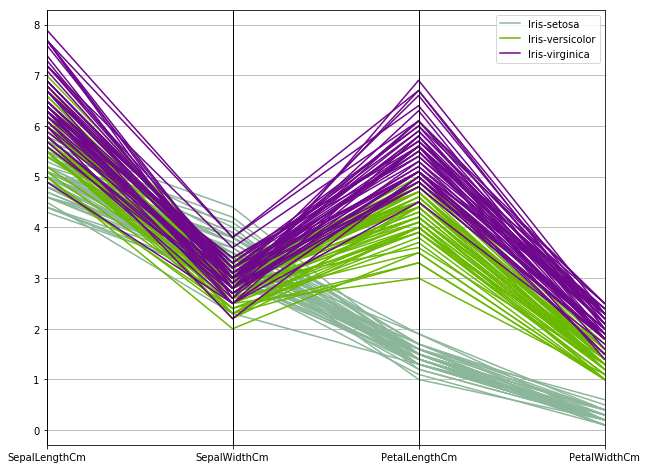

In [9]:
plt.figure(figsize = (10,8))
parallel_coordinates(df, 'Species')

In [12]:
df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [10]:
import numpy as np

X = df.drop('variety',axis=1)
y = df['variety']

from sklearn.naive_bayes import GaussianNB
ob = GaussianNB()

ob.fit(X,y)


GaussianNB(priors=None, var_smoothing=1e-09)

In [12]:
from sklearn.metrics import classification_report

print("The classification report is as follows...\n")
print(classification_report(ob.predict(X),y))

The classification report is as follows...

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.94      0.94      0.94        50
 Iris-virginica       0.94      0.94      0.94        50

      micro avg       0.96      0.96      0.96       150
      macro avg       0.96      0.96      0.96       150
   weighted avg       0.96      0.96      0.96       150



In [14]:
from sklearn.metrics import confusion_matrix

In [16]:
cm = (confusion_matrix(y,ob.predict(X)))
cmdf = pd.DataFrame(cm,index=['Class 1','Class 2',' Class 3'], columns=['Class 1','Class 2',' Class 3'])
print("The confusion matrix looks like following...\n")
cmdf

The confusion matrix looks like following...



,Class 1,Class 2,Class 3
Class 1,50,0,0
Class 2,0,47,3
Class 3,0,3,47


In [19]:
new_df = pd.DataFrame({'SepalLengthCm':5.1,  'SepalWidthCm':3.5,  'PetalLengthCm':3.0,  'PetalWidthCm':0.2}, index = [0])

In [20]:
print (ob.predict(new_df))

['Iris-versicolor']


### The Naïve assumption
    The classifier will now assume that PetalLength is an independent and equally contributing feature for the classification and build a classifier as below.
    
    Naive Bayesian models are easy to build and particularly useful for small & medium sized data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods. This classifier is used in various critical domains such as diagnosis of diseases, sentiment analysis and building email spam classifiers for this reason.